In [1]:
import pandas as pd
import numpy as np

# for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

from impyute.imputation.cs import mice
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [2]:
income = pd.read_csv('census_income.csv')

### Data Exploration

In [3]:
income.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
income['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

categorical = [var for var in income.columns if income[var].dtype =='O']


print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

In [7]:
cats = [c for c in income.columns if income[c].dtypes=='object']
cats

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [8]:
income['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
income.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
income['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [11]:
income['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [12]:
income['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [13]:
income['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
income['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [15]:
income['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [16]:
income['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [17]:
income['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
income.columns = ['Age', 'Workclass_nom', 'Fnlwgt', 'Education_ord', 'Education_num',
       'Marital_status_nom', 'Occupation_nom', 'Relationship_nom', 'Race_nom', 'Sex_nom',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country_nom',
       'Income_ord']

In [19]:
ordinals= [c for c in income.columns if 'ord' in c]
nominals = [c for c in income.columns if 'nom' in c]
ordinals

['Education_ord', 'Income_ord']

In [20]:
income_orig = income.copy()

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_ord', ylabel='count'>

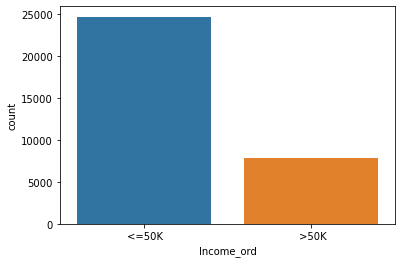

In [21]:
sns.countplot(income.Income_ord)

In [22]:
cats = nominals+ordinals


def analyse_cats(df, cat_cols):
    d = pd.DataFrame()
    cl = [];u = [];s =[]; nans =[]
    for c in cat_cols:
        #print("column:" , c ,"--Uniques:" , train[c].unique(), "--Cardinality:", train[c].unique().size)
        cl.append(c); u.append(income[c].unique());s.append(income[c].unique().size);nans.append(income[c].isnull().sum())
        
    d['"feat"'] = cl;d["uniques"] = u; d["cardinality"] = s; d["nans"] = nans
    return d

plt.style.use('fivethirtyeight')
catanadf = analyse_cats(income, cats)
catanadf

,"""feat""",uniques,cardinality,nans
0,Workclass_nom,"[ Self-emp-not-inc, Private, State-gov, Fed...",9,0
1,Marital_status_nom,"[ Married-civ-spouse, Divorced, Married-spou...",7,0
2,Occupation_nom,"[ Exec-managerial, Handlers-cleaners, Prof-s...",15,0
3,Relationship_nom,"[ Husband, Not-in-family, Wife, Own-child, ...",6,0
4,Race_nom,"[ White, Black, Asian-Pac-Islander, Amer-In...",5,0
5,Sex_nom,"[ Male, Female]",2,0
6,Native_country_nom,"[ United-States, Cuba, Jamaica, India, ?, ...",42,0
7,Education_ord,"[ Bachelors, HS-grad, 11th, Masters, 9th, ...",16,0
8,Income_ord,"[ <=50K, >50K]",2,0


In [23]:
train = income_orig.copy()

In [24]:
for c in ordinals:
    print(c,list(train[c].unique()))

Education_ord [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
Income_ord [' <=50K', ' >50K']


In [25]:
def OrdMapping(income):
    
    
    Education_ord_mapping = {' Preschool': 0,' 1st-4th': 1,' 5th-6th': 2 , ' 7th-8th':3,' 9th': 4, ' 10th': 5,' 11th': 6,' 12th': 7 , ' HS-grad':8,'Phd': 9,  ' Prof-school': 10,' Some-college': 11, ' Assoc-acdm': 12 , ' Assoc-voc': 13, ' Bachelors': 14, ' Masters': 15, ' Doctorate': 16}
    Income_ord_mapping= {' <=50K':0, ' >50K':1}
    
    income['Education_ord_mapping'] = income.Education_ord.map(Education_ord_mapping)
    income['Income_ord_mapping'] = income.Income_ord.map(Income_ord_mapping)
    
    return income

train = OrdMapping(train)


train.head()

,Age,Workclass_nom,Fnlwgt,Education_ord,Education_num,Marital_status_nom,Occupation_nom,Relationship_nom,Race_nom,Sex_nom,Capital_gain,Capital_loss,Hours_per_week,Native_country_nom,Income_ord,Education_ord_mapping,Income_ord_mapping
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,14,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,14,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,15,0


In [26]:
for c in nominals:
    le = LabelEncoder()
    le.fit(list(train[c].astype(str)))
    train[c] = le.transform(train[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   Workclass_nom {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}
target mapping :   Marital_status_nom {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
target mapping :   Occupation_nom {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, ' Transport-moving': 14}
target mapping :   Relationship_nom {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
target mapping :   Race_nom {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}
target

In [27]:
cats = ordinals + nominals

imp = SimpleImputer(strategy='most_frequent')

train[cats] = imp.fit_transform(train[cats])

In [28]:
train

,Age,Workclass_nom,Fnlwgt,Education_ord,Education_num,Marital_status_nom,Occupation_nom,Relationship_nom,Race_nom,Sex_nom,Capital_gain,Capital_loss,Hours_per_week,Native_country_nom,Income_ord,Education_ord_mapping,Income_ord_mapping
0,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,<=50K,14,0
1,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,<=50K,8,0
2,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,<=50K,6,0
3,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,<=50K,14,0
4,37,4,284582,Masters,14,2,4,5,4,0,0,0,40,39,<=50K,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,Assoc-acdm,12,2,13,5,4,0,0,0,38,39,<=50K,12,0
32556,40,4,154374,HS-grad,9,2,7,0,4,1,0,0,40,39,>50K,8,1
32557,58,4,151910,HS-grad,9,6,1,4,4,0,0,0,40,39,<=50K,8,0
32558,22,4,201490,HS-grad,9,4,1,3,4,1,0,0,20,39,<=50K,8,0


nums = [c for c in train.columns if c not in  cats]


ss = StandardScaler()
train[nums]= ss.fit_transform(train[nums])

In [29]:
train

,Age,Workclass_nom,Fnlwgt,Education_ord,Education_num,Marital_status_nom,Occupation_nom,Relationship_nom,Race_nom,Sex_nom,Capital_gain,Capital_loss,Hours_per_week,Native_country_nom,Income_ord,Education_ord_mapping,Income_ord_mapping
0,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,<=50K,14,0
1,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,<=50K,8,0
2,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,<=50K,6,0
3,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,<=50K,14,0
4,37,4,284582,Masters,14,2,4,5,4,0,0,0,40,39,<=50K,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,Assoc-acdm,12,2,13,5,4,0,0,0,38,39,<=50K,12,0
32556,40,4,154374,HS-grad,9,2,7,0,4,1,0,0,40,39,>50K,8,1
32557,58,4,151910,HS-grad,9,6,1,4,4,0,0,0,40,39,<=50K,8,0
32558,22,4,201490,HS-grad,9,4,1,3,4,1,0,0,20,39,<=50K,8,0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    32560 non-null  int64 
 1   Workclass_nom          32560 non-null  object
 2   Fnlwgt                 32560 non-null  int64 
 3   Education_ord          32560 non-null  object
 4   Education_num          32560 non-null  int64 
 5   Marital_status_nom     32560 non-null  object
 6   Occupation_nom         32560 non-null  object
 7   Relationship_nom       32560 non-null  object
 8   Race_nom               32560 non-null  object
 9   Sex_nom                32560 non-null  object
 10  Capital_gain           32560 non-null  int64 
 11  Capital_loss           32560 non-null  int64 
 12  Hours_per_week         32560 non-null  int64 
 13  Native_country_nom     32560 non-null  object
 14  Income_ord             32560 non-null  object
 15  Education_ord_mappi

In [31]:
train1 = train.drop(['Education_ord', 'Income_ord'], axis=1)

In [32]:
train1

,Age,Workclass_nom,Fnlwgt,Education_num,Marital_status_nom,Occupation_nom,Relationship_nom,Race_nom,Sex_nom,Capital_gain,Capital_loss,Hours_per_week,Native_country_nom,Education_ord_mapping,Income_ord_mapping
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,14,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,8,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,6,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,14,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39,12,0
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39,8,1
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39,8,0
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39,8,0


In [33]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    32560 non-null  int64 
 1   Workclass_nom          32560 non-null  object
 2   Fnlwgt                 32560 non-null  int64 
 3   Education_num          32560 non-null  int64 
 4   Marital_status_nom     32560 non-null  object
 5   Occupation_nom         32560 non-null  object
 6   Relationship_nom       32560 non-null  object
 7   Race_nom               32560 non-null  object
 8   Sex_nom                32560 non-null  object
 9   Capital_gain           32560 non-null  int64 
 10  Capital_loss           32560 non-null  int64 
 11  Hours_per_week         32560 non-null  int64 
 12  Native_country_nom     32560 non-null  object
 13  Education_ord_mapping  32560 non-null  int64 
 14  Income_ord_mapping     32560 non-null  int64 
dtypes: int64(8), object

In [34]:
for column in train1.columns:
    if train1[column].dtype == 'object':
        train1[column] = train1[column].astype(np.int64)

In [35]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    32560 non-null  int64
 1   Workclass_nom          32560 non-null  int64
 2   Fnlwgt                 32560 non-null  int64
 3   Education_num          32560 non-null  int64
 4   Marital_status_nom     32560 non-null  int64
 5   Occupation_nom         32560 non-null  int64
 6   Relationship_nom       32560 non-null  int64
 7   Race_nom               32560 non-null  int64
 8   Sex_nom                32560 non-null  int64
 9   Capital_gain           32560 non-null  int64
 10  Capital_loss           32560 non-null  int64
 11  Hours_per_week         32560 non-null  int64
 12  Native_country_nom     32560 non-null  int64
 13  Education_ord_mapping  32560 non-null  int64
 14  Income_ord_mapping     32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [36]:
X= train1.iloc[:,:-1]

In [37]:
X

,Age,Workclass_nom,Fnlwgt,Education_num,Marital_status_nom,Occupation_nom,Relationship_nom,Race_nom,Sex_nom,Capital_gain,Capital_loss,Hours_per_week,Native_country_nom,Education_ord_mapping
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,14
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,8
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,6
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,14
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,12,2,13,5,4,0,0,0,38,39,12
32556,40,4,154374,9,2,7,0,4,1,0,0,40,39,8
32557,58,4,151910,9,6,1,4,4,0,0,0,40,39,8
32558,22,4,201490,9,4,1,3,4,1,0,0,20,39,8


In [38]:
y = train1.iloc[:,-1]

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income_ord_mapping, Length: 32560, dtype: int64

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [41]:
validation_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [42]:
print(X_train.shape)

(26048, 14)


In [43]:
print(X_test.shape)

(6512, 14)


In [44]:
print(y_train.shape)

(26048,)


In [45]:
print(y_test.shape)

(6512,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

********************************************************************************************************************************

The following sections were heavily inspired on this resource: https://www.kaggle.com/code/richarde/easy-pipeline-and-model-selection/notebook

In [47]:
#evaluation - baselines
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LR 0.791039 0.009558 
KNN 0.777104 0.007396 
CART 0.807202 0.005779 
SVM 0.794841 0.007075 


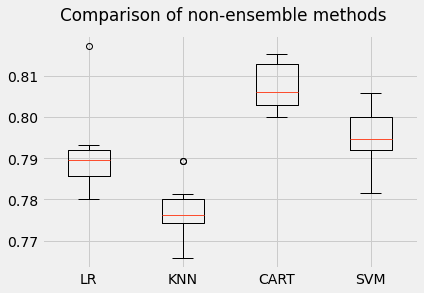

In [48]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

********************************************************************************************************************************

The following sections were heavily inspired on this resource: https://www.kaggle.com/code/bahaulug/classification-and-regression-tree-cart

#### Hyperparameter Optimization of CART model with GridSearchCV

In [49]:
cart_model = DecisionTreeClassifier()

In [50]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
# Hyperparameter set to search:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [52]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [53]:
# Hyperparameter set to search:
cart_params = {'max_depth': range(1, 11), "min_samples_split": range(2, 20)}

In [54]:
cart_best_grid.best_params_

{'max_depth': 8, 'min_samples_split': 11}

In [55]:
cart_best_grid.best_score_

0.8541923269522076

In [56]:
random = X.sample(1, random_state=45)
print(random)

      Age  Workclass_nom  Fnlwgt  Education_num  Marital_status_nom  \
6299   77              6  209507             10                   4   

      Occupation_nom  Relationship_nom  Race_nom  Sex_nom  Capital_gain  \
6299               3                 1         4        1             0   

      Capital_loss  Hours_per_week  Native_country_nom  Education_ord_mapping  
6299             0              40                  39                     11  


In [57]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,
                                    random_state=17).fit(X_train, y_train)

In [58]:
from sklearn.model_selection import cross_validate

In [59]:
# CV error of final model:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "f1", "roc_auc"])

In [60]:
cv_results['test_accuracy'].mean()

0.8543611793611794

In [61]:
cv_results['test_f1'].mean()

0.6465933114843069

In [62]:
cv_results['test_roc_auc'].mean()

0.9012695638655341

In [63]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

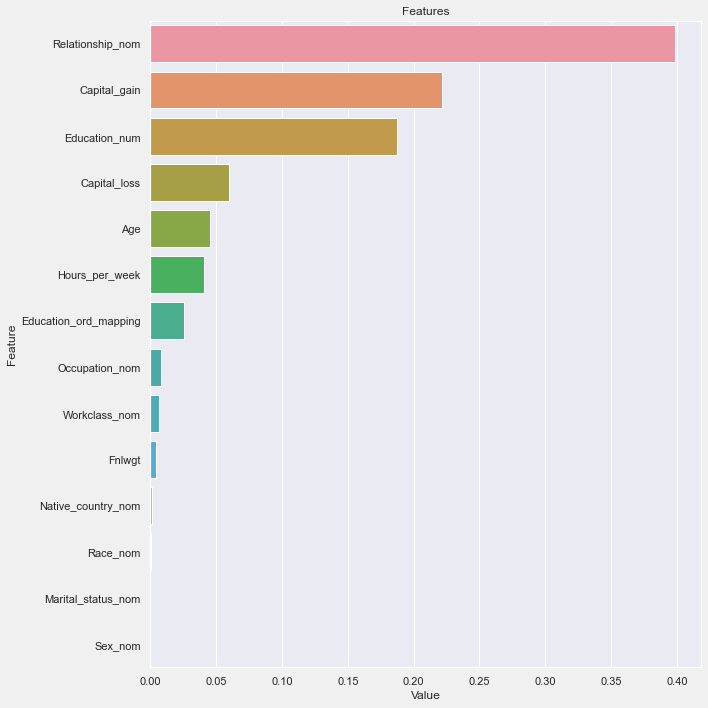

In [64]:
plot_importance(cart_final, X, 15)
